In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/data/series/"

SIZE = 10000

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"

datafiles = [
    "wide_svd|2025-05-25/data.json",
    "svd_patch_logic|2025-05-27/data.json",
    "svd_001|2025-05-27/data.json",
]

In [8]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)
df.columns

ratios: [100.0]
patch recovery: [0.0002 0.002 0.001]
max costs: [2.0]
boundary conditions: ['PERIODIC' 'SOLID']
num locations: [20 10]
random walker seeds: 8
random locations seeds: 2
patch recovery logic: ['LINEAR' 'SATURATING' 'LOGISTIC']
steps: 10000


Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'ratio'],
      dtype='object')

In [18]:
recoveries = [0.002]
numLocations = [10]
seedLocations = [1, 2]
boundaryConditions = ["PERIODIC", "SOLID"]

i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                _all = df[
                    (df["settings.patchRecovery"] == recovery) &
                    (df["settings.improvementLogic"] == "SATURATING") &
                    (df["settings.numLocations"] == numLocation) &
                    (df["settings.randomSeedLocations"] == seedLocation) &
                    (df["settings.boundaryConditions"] == boundaryCondition)
                ]

                U, S, Vh = util.svd(_all, 10000, plot=False, dynamics=False)
                s = S**2/sum(S**2)

                print(i, s[0], " --------- ", recovery, numLocation, seedLocation, boundaryCondition, (S[0] / sum(S)))
                i += 1


0 0.5665641309763385  ---------  0.002 10 1 PERIODIC 0.3076136115734073
1 0.7161807886345627  ---------  0.002 10 1 SOLID 0.3856681329734129
2 0.8398655524931363  ---------  0.002 10 2 PERIODIC 0.4843609813813157
3 0.6293530849667742  ---------  0.002 10 2 SOLID 0.3343930927015454


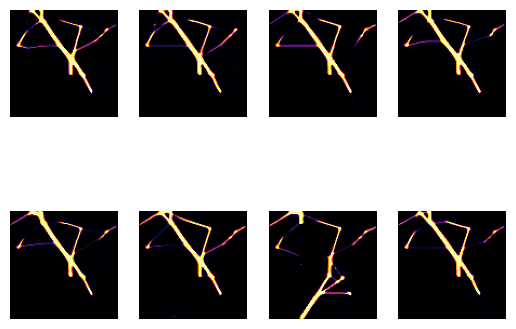

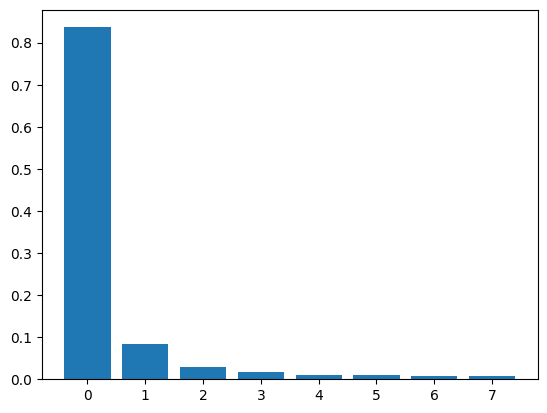

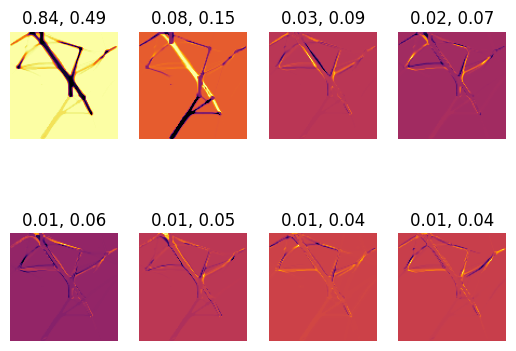

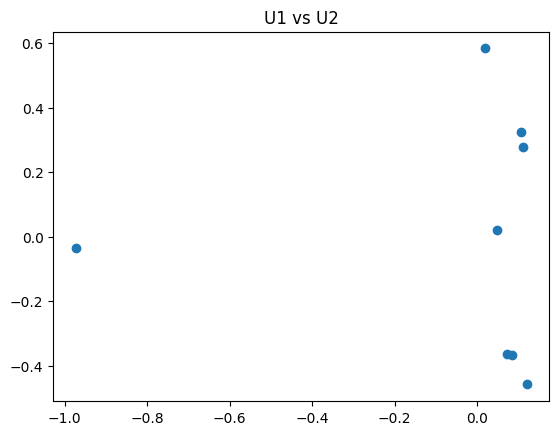

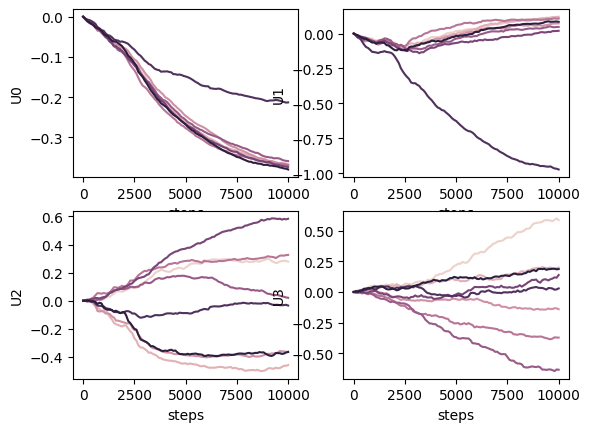

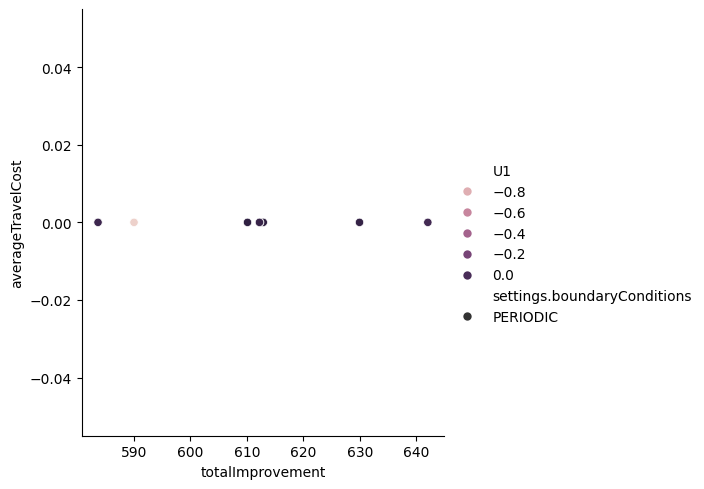

In [6]:
_all = df[
    (df["settings.patchRecovery"] == 0.0002) &
    # (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.boundaryConditions"] == "PERIODIC") &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

util.plot_patches(_all[_all["steps"] == 10000])
U, S, Vh = util.svd(_all, 10000)

# Summary of results

This is probably the clearest example of two distinct solutions:

10 locations, periodic conditions, random seed 1.

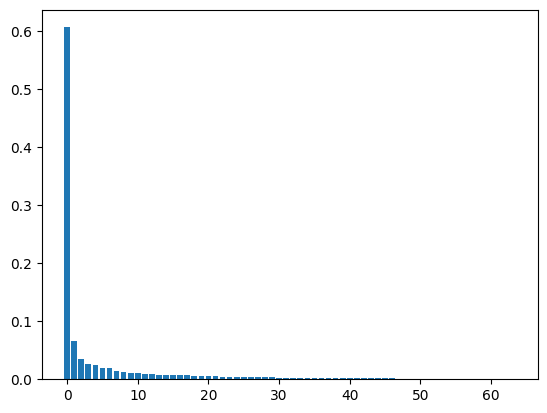

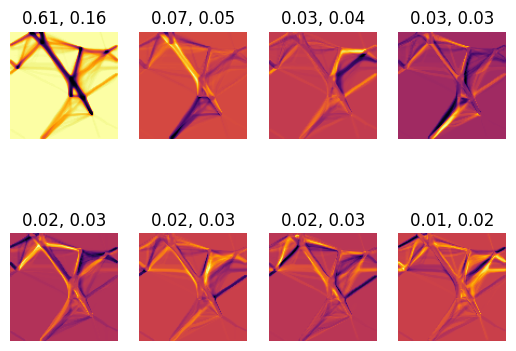

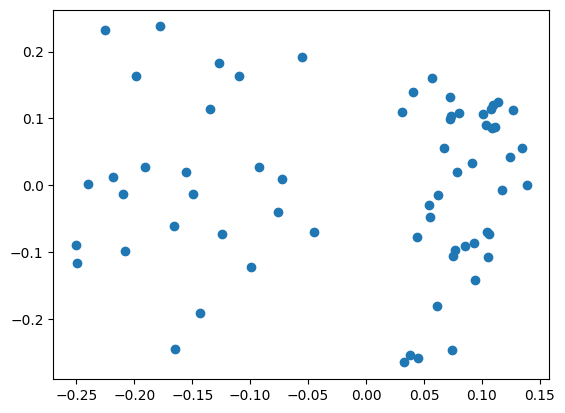

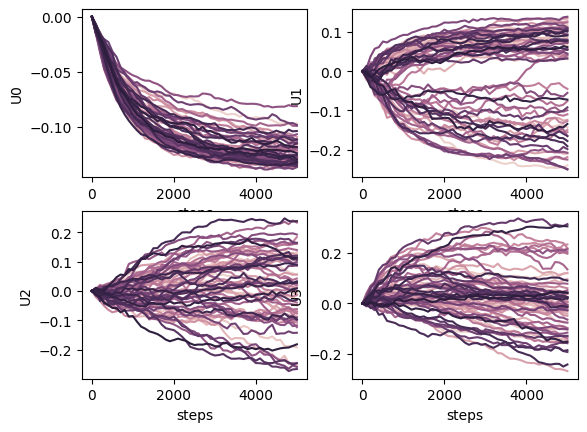

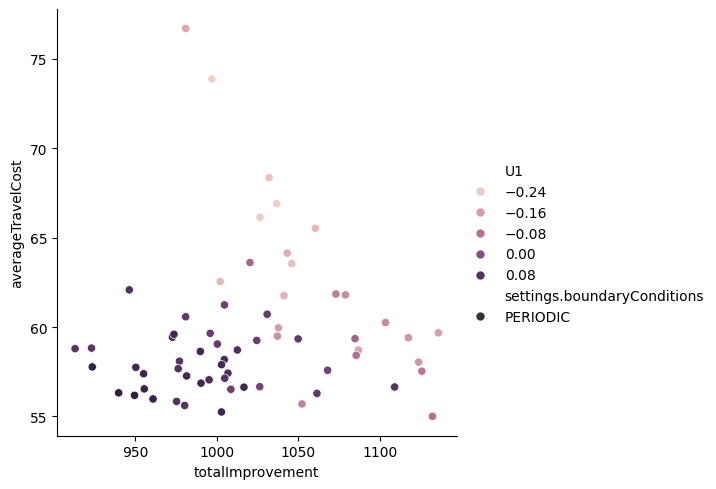

In [347]:
_all = df[
    (df["settings.patchRecovery"] == 0.001) &
    # (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.boundaryConditions"] == "PERIODIC") &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

# _finals = _all[_all["steps"] == 5000]

# util.plot_patches(_finals)
U, S, Vh = svd(_all, 5000)